# COP501 CW - George Brown

### Import statements

In [1]:
from gameSearch import *
from gameRent import *
from gameReturn import *
from gameSelect import *
import ipywidgets as widgets
from IPython.display import clear_output


### Create Instances

In [2]:
gamesearch = GameSearch()
gamerent = GameRent()
gamereturn = GameReturn()
gameselect = GameSelect()


### Initialise database

In [3]:
def initialise_databases(btn):
    clear_output(wait=True)
    display(allw)
    gamesearch.__init__()
    with output:
        clear_output(wait=True)
        print("Database initialised.")



### Search for game 

In [4]:
def search_game(game_title):
    clear_output(wait=True)
    display(allw)
    game_title = game_search_field.value
    with output:
        clear_output(wait=True)  # Clear the output area without removing the buttons
        gamesearch.search_games_by_title(game_title)
    


### Rent Game

In [5]:
def rent_game(b):
    clear_output(wait=True)
    display(allw)
    customer_id = customer_id_field.value
    game_id = game_id_field.value
    
    if not (customer_id.isdigit() and int(customer_id) > 0):
        print("Enter a valid customer ID number.")
        return
    
    if not (game_id.isdigit() and int(game_id) > 0):
        print("Enter a valid game ID number.")
        return
    
    result = gamerent.rent_game(customer_id, game_id)
    with output:
        clear_output(wait=True)
        print(result)



    
    

 ### Return Game

In [6]:
def return_game(b):
    clear_output(wait=True)
    display(allw)
    customer_id = return_customer_id_field.value
    game_id = return_game_id_field.value
    
    result = gamereturn.return_game(customer_id, game_id)
    with output:
        clear_output(wait=True)
        print(result)

### Select Game

In [7]:

def select_game(b):
    clear_output(wait=True)
    display(allw)

    budget = budget_field.value
    
    try:
        budget_int = int(budget)
        if budget_int <= 0:
            with output:
                print("Budget must be a positive number.")
            return
    except ValueError:
        with output:
            print("Budget must be a valid number.")
        return

    recommendations = gameselect.select_games_for_purchase(budget_int)
    
    with output:
        if not recommendations.empty:
            clear_output(wait=True)
            print("Purchase Recommendations:")
            
            print(recommendations)
  
        else:
            clear_output(wait=True)
            print("No purchase recommendations found.")


### Genre stats

In [8]:
def genre_stats(b):
    clear_output(wait=True)
    display(allw)
    genre_popularity = gameselect.select_popular_genres()
    
    with output:
        clear_output(wait=True)
        
        print(genre_popularity)

        
    
    

### Game title stats

In [9]:
def game_title_stats(b):
    clear_output(wait=True)
    display(allw)
    
    title_popularity = gameselect.select_games_by_popularity()
    
    with output:
        clear_output(wait=True)
        print(title_popularity)
        
    

### Rental History

In [10]:
def rental_history(b):
    clear_output(wait=True)
    display(allw)
    history = gamerent.view_rental_history()
    with output:
        clear_output(wait=True)
        print(history)
    

### Purchase Game

In [11]:
def add_puchase(b):
    
    clear_output(wait=True)
    display(allw)
    
    title = purchase_game_title_field.value
    genre = purchase_genre_field.value
    copies = int(purchase_copies_field.value)
    purchase_price = purchase_price_field.value
    platform = purchase_platform_field.value
    
    purchase_games = gameselect.add_purchased_games(title, genre, platform, copies, purchase_price)
    
    with output:
        clear_output(wait=True)
        print(purchase_games)

### Main Menu

In [12]:


# Set style for widget descriptions
description_style = {'description_width': 'initial'}  # Adjust the width as needed

# init button
btnMain = widgets.Button(description='Initialize DB', layout=widgets.Layout(margin='0 20px 0 0'))
btnMain.on_click(initialise_databases)

# Search field
game_search_field = widgets.Text(description="Enter game title:", style=description_style)

# Rent fields
customer_id_field = widgets.Text(description="Enter customer ID:", style=description_style)
game_id_field = widgets.Text(description="Enter game ID:", style=description_style)

# Return fields
return_customer_id_field = widgets.Text(description="Enter customer ID:", style=description_style)
return_game_id_field = widgets.Text(description="Enter game ID:", style=description_style)

# budget field
budget_field = widgets.Text(description="Enter Budget:", style=description_style)

# purchase fields
purchase_game_title_field = widgets.Text(description="Enter game title:", style=description_style)
purchase_genre_field = widgets.Text(description="Enter game genre:", style=description_style)
purchase_copies_field = widgets.Text(description="Enter number of copies:", style=description_style)
purchase_price_field = widgets.Text(description="Enter game price:", style=description_style)
purchase_platform_field = widgets.Text(description="Enter game platform:", style=description_style)






# Search Button
search_button = widgets.Button(description="Search", layout=widgets.Layout(margin='0 20px 0 0'))
search_button.on_click(search_game)

# Rent button
rent_button = widgets.Button(description="Rent", layout=widgets.Layout(margin='0 20px 0 0'))
rent_button.on_click(rent_game)

# Return button
return_button = widgets.Button(description="Return", layout=widgets.Layout(margin='0 20px 0 0'))
return_button.on_click(return_game)

# Select Button
select_button = widgets.Button(description="Recommendations", layout=widgets.Layout(margin='0 20px 0 0'))
select_button.on_click(select_game)

# History button
history_button = widgets.Button(description="History", layout=widgets.Layout(margin='0 20px 0 0'))
history_button.on_click(rental_history)

# Genre analytics
genre_button = widgets.Button(description="Genre stats", layout=widgets.Layout(margin='0 20px 0 0'))
genre_button.on_click(genre_stats)

# Game title analytics
game_title_button = widgets.Button(description="Game title stats", layout=widgets.Layout(margin='0 20px 0 0'))
game_title_button.on_click(game_title_stats)

# Purchase game button

purchase_game_button = widgets.Button(description="Add", layout=widgets.Layout(margin='0 20px 0 0'))
purchase_game_button.on_click(add_puchase)

#Titles

# Title for Initialization Section
init_title = widgets.HTML(value="<h2>Initialization</h2>")

# Search Title
search_title = widgets.HTML(value="<h2>Search</h2>")

# Rent Title
rent_title = widgets.HTML(value="<h2>Rent</h2>")

# Return Title
return_title = widgets.HTML(value="<h2>Return</h2>")

# Select Title
select_title = widgets.HTML(value="<h2>Game Select</h2>")

# Purchase Title
purchase_title = widgets.HTML(value="<h2>Purchase</h2>")




output = widgets.Output()

# Layout
init_buttons = widgets.HBox([btnMain, history_button], layout=widgets.Layout(margin='10px 0'))
game_search = widgets.HBox([game_search_field, search_button], layout=widgets.Layout(margin='10px 0'))
game_rent = widgets.HBox([customer_id_field, game_id_field, rent_button], layout=widgets.Layout(margin='10px 0'))
game_return = widgets.HBox([return_customer_id_field, return_game_id_field, return_button], layout=widgets.Layout(margin='10px 0'))
analytics = widgets.HBox([game_title_button, genre_button], layout=widgets.Layout(margin='10px 0'))
game_select = widgets.HBox([budget_field, select_button], layout=widgets.Layout(margin='10px 0'))
game_purchase1 = widgets.HBox([purchase_game_title_field, purchase_genre_field, purchase_platform_field], layout=widgets.Layout(margin='10px 0'))
game_purchase2 = widgets.HBox([purchase_copies_field,purchase_price_field,purchase_game_button], layout=widgets.Layout(margin='10px 0'))



allw = widgets.VBox([init_title,init_buttons,search_title, game_search, rent_title, game_rent,return_title, game_return, select_title, analytics, game_select, purchase_title ,game_purchase1, game_purchase2, output])



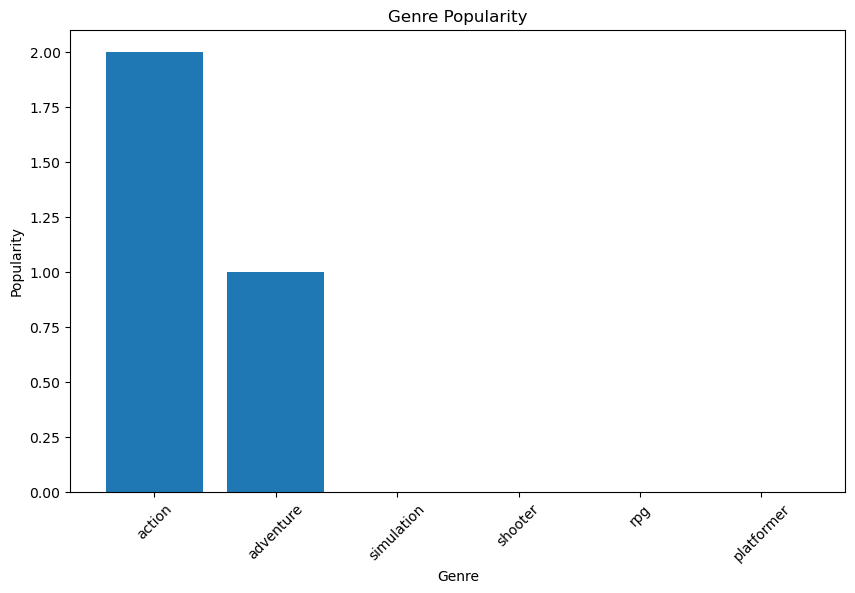

In [13]:
display(allw)
